# Implementation of Perceptron

In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.7.0

numpy     : 1.23.5
pandas    : 1.5.2
matplotlib: 3.6.2



In [40]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Visualization

In [5]:
df = pd.read_csv("data/perceptron-toydata-truncated.txt", sep="\t")
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [6]:
x_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [7]:
print(x_train.shape, y_train.shape)

(20, 2) (20,)


In [8]:
np.bincount(y_train) # binary classification 10 label - 0 and 10 label - 1

array([10, 10])

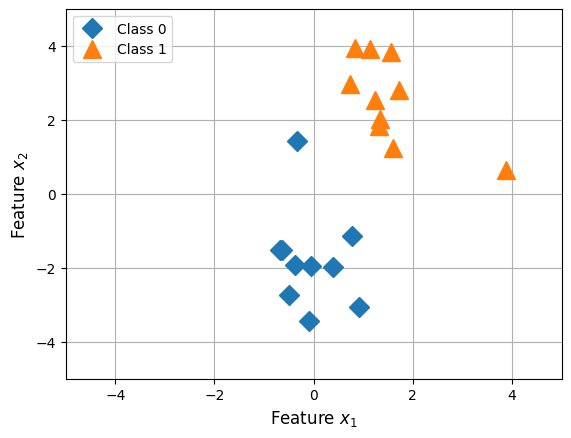

In [9]:
plt.plot(
    x_train[y_train == 0, 0],
    x_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0"
)

plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker = "^",
    markersize = 13,
    linestyle = "",
    label = "Class 1"
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## Building a Perceptron using NumPy

In [58]:

from typing import List

class Perceptron:
    def __init__(self, num_features: int, learning_rate: float = 0.5) -> int:
        self.num_features: int = num_features
        self.weights: List[float] = [random.randint(0, 9)/1000 for _ in range(num_features)]
        self.bias: int = 0.0
        self.learning_rate = learning_rate
    
    def forward(self, observations: List[float]) -> None:
        weighted_sum: float = self.bias # z
        for i, _ in enumerate(self.weights):
            weighted_sum = (weighted_sum + observations[i]) * self.weights[i]
        
        if weighted_sum > 0.0:
            return 1
        return 0
    
    def update(self, features: List[float], true_label: int) -> float:
        prediction: float = self.forward(features)
        error: float = true_label - prediction

        # update
        self.bias = self.bias + self.learning_rate + error
        for i, _ in enumerate(self.weights):
            self.weights[i] = self.weights[i] + error * features[i]
        
        return error

In [59]:
perceptron = Perceptron(num_features = 2)
print(perceptron.weights, perceptron.bias)

observations: List[float] = [1.1, 2.1]
perceptron.update(features=observations, true_label=1)

[0.002, 0.009] 0.0


0

## Training Perceptron

In [60]:
def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count: int = 0
        for x, y, in zip(all_x, all_y):
            error: float = model.update(x, y)
            error_count = error_count + abs(error)
        
        print(f"Epoch {epoch+1} - Errors: {error_count}")

In [74]:
perceptron = Perceptron(num_features = 2, learning_rate=0.01)
train(model=perceptron, all_x=x_train, all_y=y_train, epochs=5)

Epoch 1 - Errors: 3
Epoch 2 - Errors: 0
Epoch 3 - Errors: 0
Epoch 4 - Errors: 1
Epoch 5 - Errors: 0


In [75]:
print("Model parameters: ")
print(f"    Weights: {perceptron.weights}")
print(f"    Bias: {perceptron.bias}")

Model parameters: 
    Weights: [2.534, 3.4209999999999994]
    Bias: -0.9999999999999991


## Evaluating the results

In [76]:
def compute_accuracy(model, all_x, all_y) -> float:
    correct: float = 0.0

    for x, y in zip(all_x, all_y):
        prediction: int = model.forward(x)
        correct = correct + int(prediction == y)

    return correct/len(all_y)

training_accuracy: float = compute_accuracy(perceptron, x_train, y_train)

print(f"Accuracy: {training_accuracy * 100}")

Accuracy: 100.0


## Visualizing the decision boundary

In [77]:
def plot_boundary(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) -b) / w2
    x1_max = 20
    x2_max = (-(w1 * x1_max) -b) / w2

    return x1_min, x1_max, x2_min, x2_max

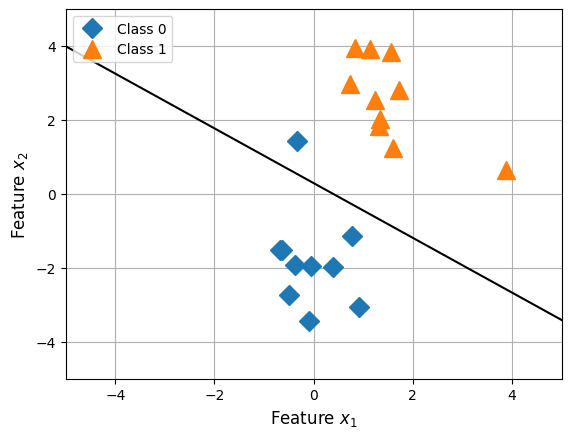

In [78]:

x1_min, x1_max, x2_min, x2_max = plot_boundary(perceptron)


plt.plot(
    x_train[y_train == 0, 0],
    x_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0"
)

plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker = "^",
    markersize = 13,
    linestyle = "",
    label = "Class 1"
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")
plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()